In [ ]:
import pandas as pd
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
data=pd.read_csv(r"/content/Anamoly_detection.csv")

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,anomaly


In [ ]:
data.shape

(25192, 42)

In [ ]:
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
data.dtypes

,0
duration,int64
protocol_type,object
service,object
flag,object
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
data['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


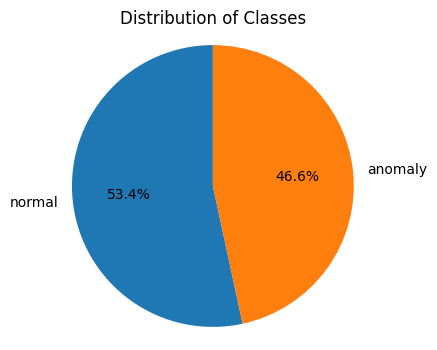

In [ ]:
import matplotlib.pyplot as plt
class_counts = data['class'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal')
plt.show()


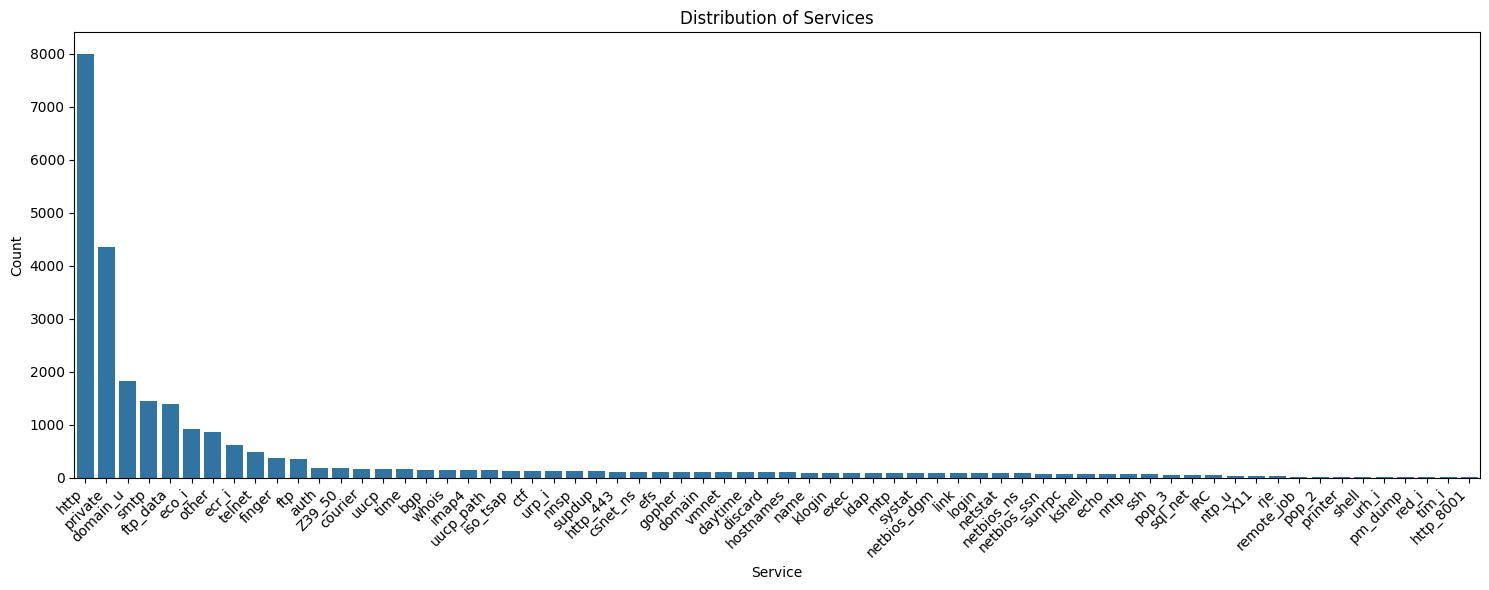

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'service' in data.columns:
    service_counts = data['service'].value_counts()

    plt.figure(figsize=(15, 6))
    sns.barplot(x=service_counts.index, y=service_counts.values)
    plt.xlabel("Service")
    plt.ylabel("Count")
    plt.title("Distribution of Services")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("'service' column not found in the DataFrame. Please replace 'service' with the correct column name.")


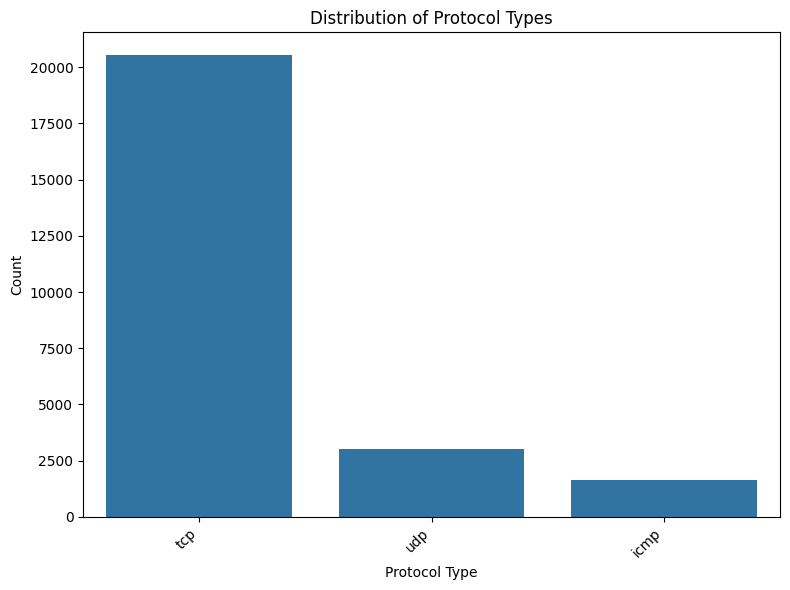

In [ ]:
if 'protocol_type' in data.columns:
    protocol_counts = data['protocol_type'].value_counts()

    plt.figure(figsize=(8, 6))
    sns.countplot(x='protocol_type', data=data)
    plt.xlabel("Protocol Type")
    plt.ylabel("Count")
    plt.title("Distribution of Protocol Types")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("'protocol_type' column not found in the DataFrame.")


In [ ]:
data = data.drop_duplicates()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['protocol_type', 'service', 'flag', 'class']:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])
    else:
        print(f"Column '{col}' not found in the DataFrame.")


data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
# prompt: convert the data into a csv file after label encoding

# Assuming 'data' DataFrame is already created and label encoded as in your previous code.

data.to_csv('encoded_data.csv', index=False)


<Axes: >

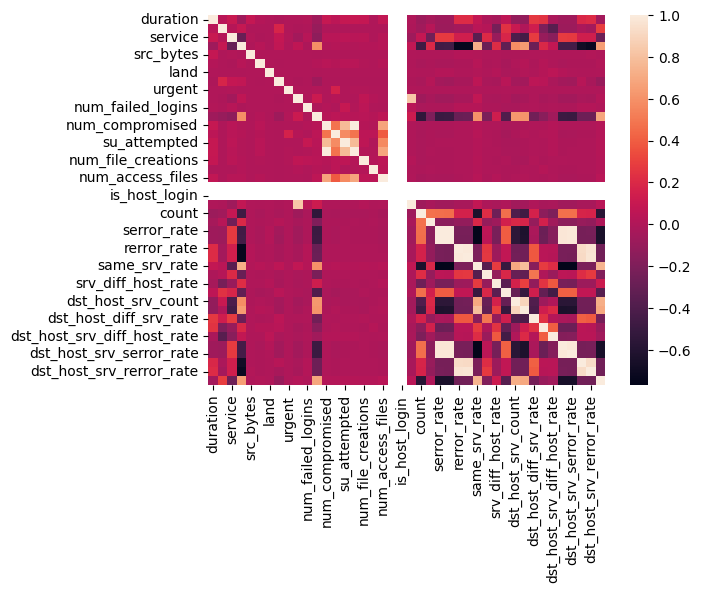

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.dtypes

,0
duration,int64
protocol_type,int64
service,int64
flag,int64
src_bytes,int64
dst_bytes,int64
land,int64
wrong_fragment,int64
urgent,int64
hot,int64


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = data.drop('class', axis=1)
y = data['class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['class'] = y_resampled

print(data_resampled['class'].value_counts())


class
1    13449
0    13449
Name: count, dtype: int64


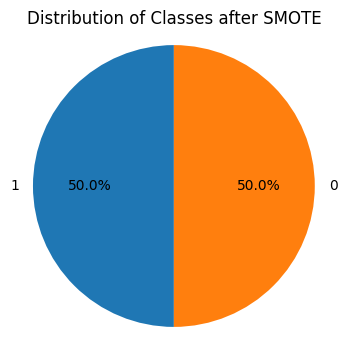

In [ ]:
import matplotlib.pyplot as plt
class_counts_resampled = data_resampled['class'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(class_counts_resampled, labels=class_counts_resampled.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes after SMOTE')
plt.axis('equal')
plt.show()


In [ ]:
data_resampled['class'].value_counts()

,count
class,
1,13449
0,13449


In [ ]:
X = data.drop('class', axis=1)
y = data['class']


In [ ]:
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
y.tail()

,class
25187,0
25188,0
25189,0
25190,0
25191,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
2199,0,0,13,9,8,0,0,0,0,0,...,1,143,1.00,0.00,1.00,0.50,0.0,0.0,0.0,0.0
15288,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.06,0.00,0.00,1.0,1.0,0.0,0.0
4139,0,1,41,9,16787,0,0,0,0,0,...,20,1,0.05,0.20,0.85,0.00,0.0,0.0,0.0,0.0
3505,0,1,46,5,0,0,0,0,0,0,...,255,11,0.04,0.08,0.00,0.00,1.0,1.0,0.0,0.0
19281,0,1,4,5,0,0,0,0,0,0,...,255,24,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0,2,11,9,46,71,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0
5390,1,1,51,9,1601,326,0,0,0,0,...,92,52,0.57,0.05,0.01,0.00,0.0,0.0,0.0,0.0
860,0,1,22,1,0,0,0,0,0,0,...,255,6,0.02,0.07,0.00,0.00,0.0,0.0,1.0,1.0
15795,0,1,22,9,309,4281,0,0,0,0,...,21,255,1.00,0.00,0.05,0.05,0.0,0.0,0.0,0.0


In [ ]:
Y_train

,class
2199,0
15288,0
4139,1
3505,0
19281,0
...,...
21575,1
5390,1
860,0
15795,1


In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
Y_train.shape

(20153, 2)

In [ ]:
Y_test.shape

(5039, 2)

In [ ]:
Y_train[741]

array([1., 0.])

In [ ]:
Y_train.shape

(20153, 2)

In [ ]:
X_train.shape

(20153, 41)

In [ ]:
X_test = X_test.values.reshape((len(X_test),41,1))
X_train = X_train.values.reshape((len(X_train),41,1))

In [ ]:
X_test.shape

(5039, 41, 1)

In [ ]:
X_train.shape

(20153, 41, 1)

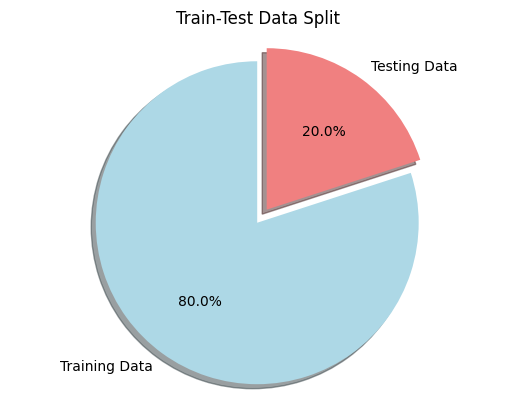

In [ ]:
import matplotlib.pyplot as plt

train_size = len(X_train)
test_size = len(X_test)

labels = ['Training Data', 'Testing Data']
sizes = [train_size, test_size]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Train-Test Data Split')
plt.show()


ANN

Softmax

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.activations import swish, gelu
from tensorflow.keras.optimizers import Adam

# Define the ANN model
ann_model = Sequential()

# Input layer
ann_model.add(Flatten(input_shape=(41, 1)))

# Hidden layers with Swish and GELU activations
ann_model.add(Dense(256, activation=swish))
ann_model.add(Dropout(0.4))

ann_model.add(Dense(128, activation=gelu))
ann_model.add(Dropout(0.4))

ann_model.add(Dense(64, activation=swish))
ann_model.add(Dropout(0.4))

# Output layer with softmax activation for binary classification
ann_model.add(Dense(2, activation='softmax'))

# Print model summary
ann_model.summary()

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 41)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          10,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,034 (203.26 KB)

 Trainable params: 52,034 (203.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = ann_model.fit(X_train,Y_train, batch_size= 128,
                    epochs = 60, validation_data = (X_test,Y_test))

Epoch 1/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7878 - loss: 1051.6199 - val_accuracy: 0.9290 - val_loss: 178.7462
Epoch 2/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8834 - loss: 834.6866 - val_accuracy: 0.9423 - val_loss: 131.8534
Epoch 3/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8821 - loss: 160.6276 - val_accuracy: 0.9454 - val_loss: 53.0373
Epoch 4/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8861 - loss: 356.9610 - val_accuracy: 0.9165 - val_loss: 117.2112
Epoch 5/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8924 - loss: 115.5040 - val_accuracy: 0.9174 - val_loss: 179.6061
Epoch 6/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 601.6081 - val_accuracy: 0.9502 - val_loss: 48.4813
Epoch 7/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss: 229.1642 - val_accuracy: 0.9212 - val_loss: 70.6373
Epoch 8/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8820 - loss

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


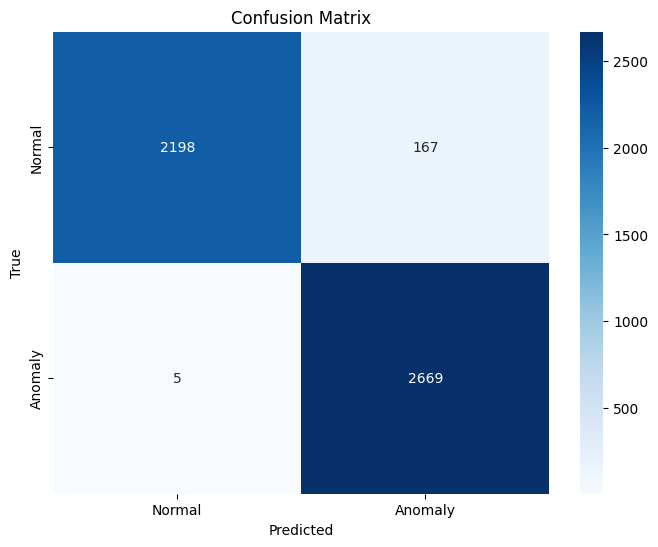

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
Y_pred = ann_model.predict(X_test)
y_pred = (Y_pred[:, 1] > 0.5).astype(int)  # Assuming second column corresponds to "Anomaly"
y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get model predictions
Y_pred = ann_model.predict([X_test, X_test])

# Convert probabilities to class labels
y_pred = np.argmax(Y_pred, axis=1)  # Predicted class (0 or 1)
y_true = np.argmax(Y_test, axis=1)  # True class labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly'])

# Print the classification report
print("Classification Report:\n", report)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 41, 1))', 'Tensor(shape=(32, 41, 1))')
  warnings.warn(msg)


146/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 41, 1))', 'Tensor(shape=(None, 41, 1))')
  warnings.warn(msg)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.93      0.96      2365
     Anomaly       0.94      1.00      0.97      2674

    accuracy                           0.97      5039
   macro avg       0.97      0.96      0.97      5039
weighted avg       0.97      0.97      0.97      5039



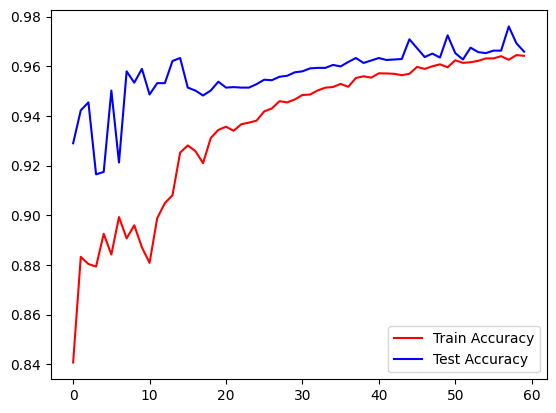

In [ ]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [ ]:
score = ann_model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9658662676811218


In [ ]:
score = ann_model.evaluate(X_train, Y_train, verbose=0)
print('train accuracy:', score[1])

train accuracy: 0.9654145836830139


Sigmoid

CNN

In [ ]:
from tensorflow.keras.utils import to_categorical  # for one-hot encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, GlobalAvgPool1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters = 32, kernel_size = 3,activation ='gelu', input_shape = (41,1)))
cnn_model.add(Conv1D(filters = 32, kernel_size = 3, activation ='gelu'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv1D(filters = 32, kernel_size = 3,activation ='gelu'))
cnn_model.add(Conv1D(filters = 32, kernel_size = 3, activation ='gelu'))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv1D(filters = 64, kernel_size = 3, activation ='gelu'))
cnn_model.add(Conv1D(filters = 64, kernel_size = 3, activation ='gelu'))
cnn_model.add(Dropout(0.4))


cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = "gelu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(2, activation = "softmax"))
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 39, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 37, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 37, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 35, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 33, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 33, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 31, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 29, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 29, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1856)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         475,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 503,906 (1.92 MB)

 Trainable params: 503,906 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer = 'rmsprop' , loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the model
history2 = cnn_model.fit(X_train,Y_train, batch_size= 128,
                    epochs = 60, validation_data = (X_test,Y_test))

Epoch 1/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6669 - loss: 424.4755 - val_accuracy: 0.9206 - val_loss: 75.7667
Epoch 2/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7717 - loss: 918.4857 - val_accuracy: 0.9286 - val_loss: 99.9290
Epoch 3/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8425 - loss: 163.5791 - val_accuracy: 0.9174 - val_loss: 85.5659
Epoch 4/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8372 - loss: 233.7294 - val_accuracy: 0.9151 - val_loss: 65.1103
Epoch 5/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8499 - loss: 1116.6182 - val_accuracy: 0.8847 - val_loss: 43.8718
Epoch 6/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8655 - loss: 689.9225 - val_accuracy: 0.9139 - val_loss: 55.1206
Epoch 7/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8662 - loss: 209.0339 - val_accuracy: 0.9174 - val_loss: 35.7940
Epoch 8/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8381 - loss: 2

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


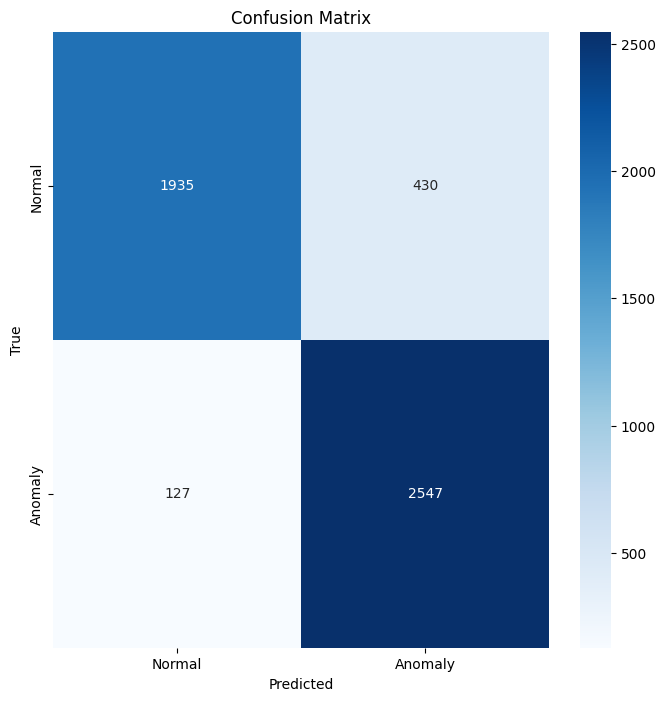

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions
Y_pred = cnn_model.predict([X_test, X_test])

# Convert probabilities to class labels
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class (0 or 1)
y_true = np.argmax(Y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Normal', 'Anomaly']

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get model predictions
Y_pred = cnn_model.predict([X_test, X_test])

# Convert probabilities to class labels
y_pred = np.argmax(Y_pred, axis=1)  # Predicted class (0 or 1)
y_true = np.argmax(Y_test, axis=1)  # True class labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly'])

# Print the classification report
print("Classification Report:\n", report)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
               precision    recall  f1-score   support

      Normal       0.94      0.82      0.87      2365
     Anomaly       0.86      0.95      0.90      2674

    accuracy                           0.89      5039
   macro avg       0.90      0.89      0.89      5039
weighted avg       0.89      0.89      0.89      5039



Hybrid

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, Concatenate
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras

# Define CNN branch
cnn_input = Input(shape=(41, 1))
cnn_branch = Conv1D(filters=32, kernel_size=3, activation='gelu')(cnn_input)
cnn_branch = Conv1D(filters=32, kernel_size=3, activation='gelu')(cnn_branch)
cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
cnn_branch = Dropout(0.4)(cnn_branch)

cnn_branch = Conv1D(filters=64, kernel_size=3, activation='gelu')(cnn_branch)
cnn_branch = Conv1D(filters=64, kernel_size=3, activation='gelu')(cnn_branch)
cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
cnn_branch = Dropout(0.4)(cnn_branch)

cnn_branch = Flatten()(cnn_branch)

# Define ANN branch
ann_input = Input(shape=(41, 1))
ann_branch = Flatten()(ann_input)
ann_branch = Dense(256, activation='gelu')(ann_branch)
ann_branch = Dropout(0.4)(ann_branch)
ann_branch = Dense(128, activation='gelu')(ann_branch)
ann_branch = Dropout(0.4)(ann_branch)
ann_branch = Dense(64, activation='gelu')(ann_branch)
ann_branch = Dropout(0.4)(ann_branch)

# Combine both branches
combined = Concatenate()([cnn_branch, ann_branch])

# Fully connected layer after merging
fc = Dense(256, activation='gelu')(combined)
fc = Dropout(0.5)(fc)
fc = Dense(2, activation='sigmoid')(fc)  # Assuming binary classification

# Create model
eemodel = Model(inputs=[cnn_input, ann_input], outputs=fc)

# Compile the model
optimiser = keras.optimizers.Adam(learning_rate=0.0002)
eemodel.compile(optimizer=optimiser, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Print summary
eemodel.summary()


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 41, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 39, 32)         │            128 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 37, 32)         │          3,104 │ conv1d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_6             │ (None, 41, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 18, 32)         │              0 │ conv1d_11[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_6 (Flatten)       │ (None, 41)             │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_17 (Dropout)      │ (None, 18, 32)         │              0 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 256)            │         10,752 │ flatten_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 16, 64)         │          6,208 │ dropout_17[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_19 (Dropout)      │ (None, 256)            │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 14, 64)         │         12,352 │ conv1d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 128)            │         32,896 │ dropout_19[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 7, 64)          │              0 │ conv1d_13[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 128)            │              0 │ dense_17[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_18 (Dropout)      │ (None, 7, 64)          │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 64)             │          8,256 │ dropout_20[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 448)            │              0 │ dropout_18[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout) 

 Total params: 205,538 (802.88 KB)

 Trainable params: 205,538 (802.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history3 = eemodel.fit([X_train, X_train], Y_train, batch_size=128,
                      epochs=60, validation_data=([X_test, X_test], Y_test))

Epoch 1/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8452 - loss: 24.5580 - val_accuracy: 0.8855 - val_loss: 3.2426
Epoch 2/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9239 - loss: 8.1972 - val_accuracy: 0.9317 - val_loss: 1.4797
Epoch 3/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9339 - loss: 11.8865 - val_accuracy: 0.9403 - val_loss: 0.6280
Epoch 4/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9374 - loss: 4.7230 - val_accuracy: 0.9512 - val_loss: 1.2870
Epoch 5/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9455 - loss: 7.2147 - val_accuracy: 0.9484 - val_loss: 0.9742
Epoch 6/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9487 - loss: 7.8952 - val_accuracy: 0.9557 - val_loss: 0.4726
Epoch 7/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9517 - loss: 0.8420 - val_accuracy: 0.9581 - val_loss: 0.5108
Epoch 8/60
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9545 - loss: 1.2041 - val_accuracy

158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

Confusion Matrix:
 [[2329   36]
 [  18 2656]]


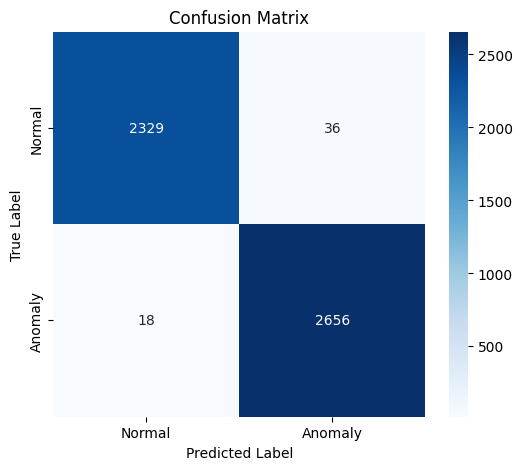

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions
y_pred = eemodel.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get model predictions
y_pred = eemodel.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



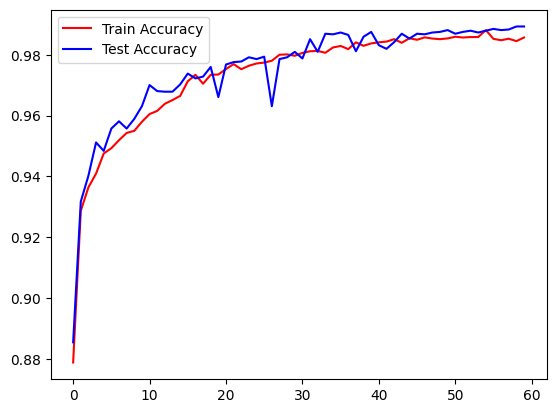

In [ ]:
plt.plot(history2.history['accuracy'], 'r')
plt.plot(history2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [ ]:
score = eemodel.evaluate(X_train, Y_train, verbose=0)
print('train accuracy:', score[1])

train accuracy: 0.9884384274482727


In [ ]:
score = eemodel.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.989283561706543


In [ ]:
# Import necessary library
from tensorflow.keras.models import Model

# Assume 'model' is your trained Keras model
cnn_model.save("eemodel.h5")  # Save the model in HDF5 format

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained ANN model
ann_model = load_model("eemodel.h5")  # Ensure correct model path

# Sample input data (ensure exactly 41 features)
sample_data = pd.DataFrame([[
    0, 1, 19, 9, 491, 0, 0, 0, 0, 0,  # First 10 features
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,  # More features
    0, 0, 0, 1, 0, 0, 150, 25,  # Last features
    0.17, 0.03, 0.17, 0, 0, 0, 0.05,0 # Ensure total 41 features
]])

# Define 41 column names (EXCLUDING the class label)
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
                'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

sample_data.columns = column_names  # Ensure correct feature alignment

# Encode categorical features (Ensure consistency with training)
categorical_features = ['protocol_type', 'service', 'flag']
encoders = {col: LabelEncoder().fit(sample_data[col]) for col in categorical_features}

for col in categorical_features:
    sample_data[col] = encoders[col].transform(sample_data[col])

# Convert to numpy array
input_data = sample_data.values  # Should have shape (1, 41)

# Standardize numerical features
scaler = StandardScaler().fit(input_data)
input_data = scaler.transform(input_data)

# Make a prediction
prediction = ann_model.predict(input_data)

# Get the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Define class labels
class_labels = ['anomaly', 'normal']

# Get the predicted class
predicted_class = class_labels[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
Predicted class: normal


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained ANN model
ann_model = load_model("eemodel.h5")  # Ensure correct model path

# New sample input data (ensure exactly 41 features)
sample_data = pd.DataFrame([[
   0,'tcp',	'private','S0',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1,1,0,0,0.05,0.07,0,255,26,0.1,0.05,0,0,1,1,0,0

]])

# Define 41 column names (EXCLUDING the class label)
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
                'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

sample_data.columns = column_names  # Ensure correct feature alignment

# Encode categorical features (Ensure consistency with training)
categorical_features = ['protocol_type', 'service', 'flag']
encoders = {col: LabelEncoder().fit(sample_data[col]) for col in categorical_features}

for col in categorical_features:
    sample_data[col] = encoders[col].transform(sample_data[col])

# Convert to numpy array
input_data = sample_data.values  # Should have shape (1, 41)

# Standardize numerical features
scaler = StandardScaler().fit(input_data)
input_data = scaler.transform(input_data)

# Make a prediction
prediction = ann_model.predict(input_data)

# Get the class with the highest probability
predicted_class_index = np.argmax(prediction)

# Define class labels
class_labels = ['normal', 'anomaly']

# Get the predicted class
predicted_class = class_labels[predicted_class_index]

print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
Predicted class: anomaly
